In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../Datasets/diabetes_cf.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.corrwith(df["Outcome"]).sort_values(ascending=False)[1:]

Glucose                     0.458421
BMI                         0.276726
Age                         0.236509
Pregnancies                 0.224437
DiabetesPedigreeFunction    0.155459
Insulin                     0.120924
SkinThickness               0.076040
BloodPressure               0.075958
dtype: float64

In [5]:
df['Pregnancies'].value_counts().sort_values(ascending=False)[1:]

0     301
2     284
3     195
4     191
5     141
6     131
7     100
8      96
9      70
10     54
11     24
12     23
13     22
14      7
17      3
15      2
Name: Pregnancies, dtype: int64

In [6]:
df = df[df['Pregnancies'] < 9]

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


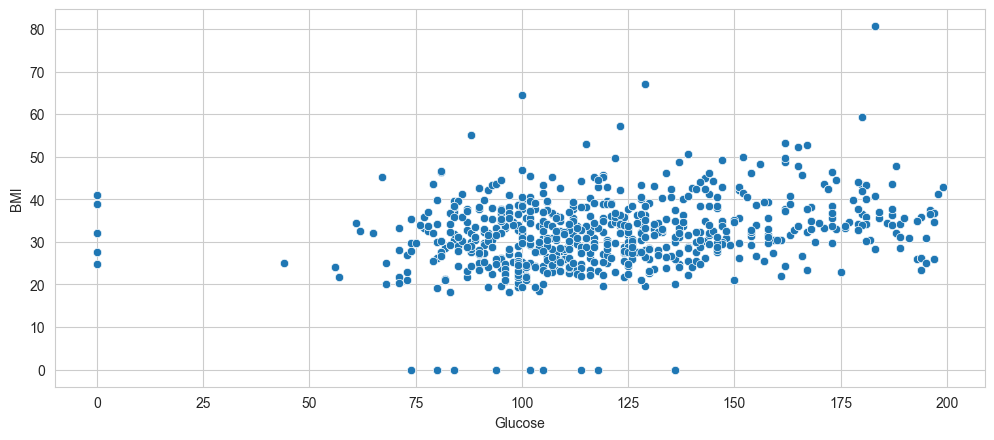

In [8]:
plt.figure(figsize=(12, 5), dpi=100)
sns.scatterplot(x=df['Glucose'], y=df['BMI']);

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1795 non-null   int64  
 1   Glucose                   1795 non-null   int64  
 2   BloodPressure             1795 non-null   int64  
 3   SkinThickness             1795 non-null   int64  
 4   Insulin                   1795 non-null   int64  
 5   BMI                       1795 non-null   float64
 6   DiabetesPedigreeFunction  1795 non-null   float64
 7   Age                       1795 non-null   int64  
 8   Outcome                   1795 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.2 KB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1795.0,2.914763,2.400525,0.000,1.0000,2.000,5.000,8.00
Glucose,1795.0,120.751532,32.315691,0.000,99.0000,116.000,140.000,199.00
BloodPressure,1795.0,68.464624,19.105535,0.000,62.0000,70.000,78.000,122.00
SkinThickness,1795.0,20.936490,16.028242,0.000,0.0000,23.000,32.000,110.00
Insulin,1795.0,82.777716,113.250874,0.000,0.0000,45.000,130.000,744.00
BMI,1795.0,32.118106,8.226857,0.000,27.2000,32.000,36.800,80.60
DiabetesPedigreeFunction,1795.0,0.468951,0.323247,0.078,0.2435,0.375,0.614,2.42
Age,1795.0,31.790529,11.411802,21.000,23.0000,28.000,37.000,72.00
Outcome,1795.0,0.316992,0.465434,0.000,0.0000,0.000,1.000,1.00


In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [13]:
df['Insulin'].value_counts()

0      831
105     28
120     21
140     21
180     20
      ... 
300      2
65       2
177      2
326      1
188      1
Name: Insulin, Length: 174, dtype: int64

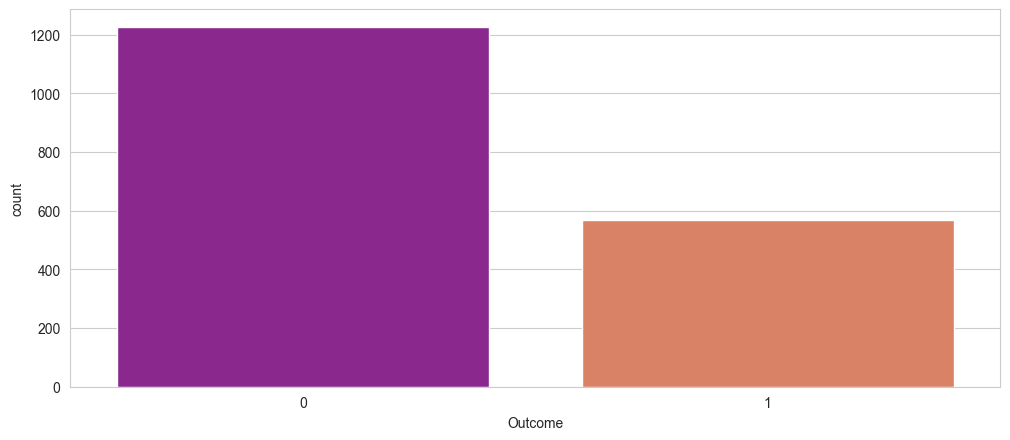

In [14]:
plt.figure(figsize=(12, 5), dpi=100)
sns.countplot(x=df['Outcome'], palette="plasma");

In [15]:
X, y = df.drop("Outcome", axis=1), df["Outcome"]

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, recall_score, classification_report
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(probability=True))
])


param_grid = {
    "clf__C":[0.01, 0.1, 1, 10],
    "clf__class_weight":[None, "balanced"],
    "clf__kernel":["rbf", "poly"],
    "clf__degree":[1, 3, 7, 9],
    "clf__gamma":["scale", "auto"]
}


grid_searcher = GridSearchCV(model, param_grid=param_grid, scoring="f1")

In [19]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC(probability=True))]),
             param_grid={'clf__C': [0.01, 0.1, 1, 10],
                         'clf__class_weight': [None, 'balanced'],
                         'clf__degree': [1, 3, 7, 9],
                         'clf__gamma': ['scale', 'auto'],
                         'clf__kernel': ['rbf', 'poly']},
             scoring='f1')

In [20]:
grid_searcher.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 SVC(C=10, class_weight='balanced', degree=1,
                     probability=True))])

In [21]:
grid_searcher.best_score_

0.7984248116504352

In [22]:
model = Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 SVC(C=10, class_weight='balanced', degree=1,
                     probability=True))])

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 SVC(C=10, class_weight='balanced', degree=1,
                     probability=True))])

In [24]:
predictions = model.predict(X_test)

In [26]:
confusion_matrix(y_test, predictions)

array([[312,  53],
       [ 35, 139]], dtype=int64)

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       365
           1       0.72      0.80      0.76       174

    accuracy                           0.84       539
   macro avg       0.81      0.83      0.82       539
weighted avg       0.84      0.84      0.84       539



In [28]:
print(recall_score(y_test, predictions))

0.7988505747126436


In [29]:
from joblib import dump

In [32]:
dump(model, "../Models/diabetes_pipeline.joblib")

['../Models/diabetes_pipeline.joblib']